In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
MoleculeList = [ 'hGCSF','hGH','3B2' ,'RBD','HSA',  'HerA'] #, 'HSA', 'Her'


Folder_List = {  '3B2': './3B2/Plates', 'RBD': './RBDJ/Plates','hGH': './hGH/Plates',
              'hGCSF': './hGCSF/sHN49to57_64_89', 'HerA': './HerA/Plates',
               'HSA': './HSA/Plates','BSA': './BSA/Plates' } #'HSA': '/HSA/Plates', 'Her': 'HSA/sHN10to23', 

Nr_list = { '3B2': [5], 'RBD': [5],'hGH': [5],
              'hGCSF': [5], 'HerA': [6], 'HSA': [4], 'BSA': [1]} # 'Her': 'HSA/sHN10to23',

version = {'3B2': ['V5'], 'RBD': ['V5'], 'hGH': ['V5'],'hGCSF': ['V5'],'HerA': ['V6'], 
           'HSA': ['V4'], 'BSA': ['V1']}

In [3]:
Strain_ID = {'3B2': [34, 36, 37, 38, 39],  'RBD': [26, 28,29,30,31], 
             'hGH': [42, 45,46,47, 48], # 44,  + [63, 88] 
             'hGCSF': [ 51, 54, 55, 56, 57], #53, + [64, 89],
            'HerA': [59, 17,22, 23],
            'HSA': [2, 3, 8, 9, 0],
            'BSA': [70, 69, 71, 72, 73, 74]} #59,

cod_type = {}
cod_type['3B2'] = ['Arch1', 'IDT', 'GeneScript','Azenta','Thermo']  
cod_type['RBD'] = [ 'Arch1',  'IDT', 'GeneScript','Azenta','Thermo']
cod_type['HerA'] = ['Arch1', 'IDT','GeneScript','Azenta', 'Thermo']#,'Arch1+mut'
cod_type['hGH'] = [  'Arch1', 'IDT', 'GeneScript','Azenta','Thermo'] #'Native',
cod_type['hGCSF'] = [' Arch1', 'IDT', 'GeneScript','Azenta','Thermo'] #'Native' ,
cod_type['HSA'] = [' Arch1', 'IDT', 'GeneScript','Azenta','Thermo']
cod_type['BSA'] = ['Native','Arch1', 'IDT', 'GeneScript','Azenta','Thermo']

In [4]:
# Property = {  '3B2': 'Titer','RBD': 'Titer', 'HerA': 'Titer', 'hGH': 'Titer', 'hGCSF': 'Titer', 
#             'HSA':'Titer', 'BSA': 'Titer'}  
# Nr = len(Nr_list)
Property = {  '3B2': 'SP','RBD': 'SP', 'HerA': 'SP', 'hGH': 'SP', 
            'hGCSF': 'SP', 'HSA':'SP', 'BSA': 'SP'}  
Nr = len(Nr_list)

Data = {}
Data_Grouped = {}
for m in MoleculeList:
    Data[m] = {}
    Data_Grouped[m]= {}
    for r in Nr_list[m]:
        Data[m][r] = pd.read_excel(Folder_List[m]+"/Titer_OD_Plate.xlsx", version[m][0])
        Data_Grouped[m][r] = {}
        Uniq_Exp = Data[m][r].iloc[:,0].unique() 
        for i in Uniq_Exp:
            Data_Grouped[m][r][i] = Data[m][r].loc[Data[m][r].iloc[:,0] == i, :]

In [5]:
Avg_titer = {}
Avg_SP = {}
Data_collect = {}


for m in MoleculeList:
    cnt_r = 0
    Avg_titer[m] = {}
    Avg_SP[m] = {}
    Data_collect[m] = {}
    for r in Nr_list[m]:
        Avg_titer[m][r] = []
        Avg_SP[m][r] = []
        Data_collect[m] = {}
        for i in Strain_ID[m]:
            try:
                Avg_titer[m][r].append(np.mean(Data_Grouped[m][r]['sHN'+str(i)]['Titer']))
                Avg_SP[m][r].append(np.mean(Data_Grouped[m][r]['sHN'+str(i)][Property[m]]))
                if cnt_r == 0:
                    Data_collect[m][i] =  Data_Grouped[m][r]['sHN'+str(i)][Property[m]].values
                else:
                    Data_collect[m][i] = np.concatenate((Data_collect[m][i], 
                                                         Data_Grouped[m][r]['sHN'+str(i)][Property[m]].values), axis = 0)

            except KeyError:
                Avg_titer[m][r].append(np.nan)
                Avg_SP[m][r].append(np.nan)
                if cnt_r == 0:
                    Data_collect[m][i] = np.nan*np.ones((Data_Grouped[m][r]['sHN'+str(Strain_ID[m][0])][Property[m]].shape[0],))
                else:
                    Data_collect[m][i] = np.concatenate((Data_collect[m][i], 
                                                         np.nan*np.ones((Data_Grouped[m][r]['sHN'+str(Strain_ID[m][0])][Property[m]].shape[0],))), axis = 0)

                continue
            
        if m == 'HerA': 
            Avg_titer['HerA'][r].append(np.mean(Data_Grouped['HerA'][r]['S1312']['Titer']))
            Avg_SP['HerA'][r].append(np.mean(Data_Grouped['HerA'][r]['S1312'][Property['HerA']]))
            if cnt_r == 0:
                Data_collect['HerA']['S1312'] =  Data_Grouped['HerA'][r]['S1312'][Property['HerA']].values
            else:
                Data_collect['HerA']['S1312'] = np.concatenate((Data_collect['HerA'][i], 
                                                             Data_Grouped['HerA'][r]['S1312'][Property['HerA']].values), axis = 0)
    
    cnt_r = cnt_r + 1

In [6]:
# params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
# hfont = {'fontname':'Arial'} #, 'weight' : 'bold'
# plt.rcParams.update(params)
# plt.rcParams["figure.figsize"] = (6, 6)
# plotting = np.zeros((5, len(MoleculeList)))
# import seaborn as sns
# xlabel_value = MoleculeList
# for m in range(len(MoleculeList)):
#     print(MoleculeList[m])
    
#     plotting[:,m:m+1] = pd.DataFrame(Avg_SP[MoleculeList[m]]).values
#     if MoleculeList[m] == 'HerA':
#         xlabel_value[m] = 'mAb'
        
#     else:
#         xlabel_value[m] = MoleculeList[m]
        
        
# f, ax = plt.subplots(1,1, sharex= False, facecolor='w')
# plt.gcf().subplots_adjust(bottom=0.4, left = 0.15)    
# h_map = sns.heatmap(pd.DataFrame(plotting)/plotting.max(axis = 0), 
#                     linewidths=2,  linecolor = 'black',
#                     cmap= sns.color_palette('YlGnBu', as_cmap=True),
#                     annot = True, fmt='.1f',
#                annot_kws = {'fontname': 'Arial', 'fontsize': 20}, #cbar_kws= {'fontname': 'Arial'},
#                        xticklabels = xlabel_value)
# ax.set_xticklabels(xlabel_value, **hfont)
# ax.set_yticklabels(cod_type['HSA'], **hfont, rotation = 0)

# cbar = h_map.collections[0].colorbar
# cbar.ax.tick_params(labelsize=20)

In [7]:
plotting = np.zeros((5, len(MoleculeList)))
import seaborn as sns
xlabel_value = MoleculeList
ylabel_value = cod_type['HSA']
ylabel_value[ylabel_value.index(' Arch1')] = 'Pichia-CLM'
ylabel_value[ylabel_value.index('GeneScript')] = 'GenScript'

for m in range(len(MoleculeList)):
    print(MoleculeList[m])
    
    plotting[:,m:m+1] = pd.DataFrame(Avg_titer[MoleculeList[m]]).values
    if MoleculeList[m] == 'HerA':
        xlabel_value[m] = 'Trast'
        
    else:
        xlabel_value[m] = MoleculeList[m]
        
Avg_score = (pd.DataFrame(plotting)/plotting.max(axis = 0)).sum(axis = 1)
index_id = Avg_score.sort_values(ascending=False).index

hGCSF
hGH
3B2
RBD
HSA
HerA


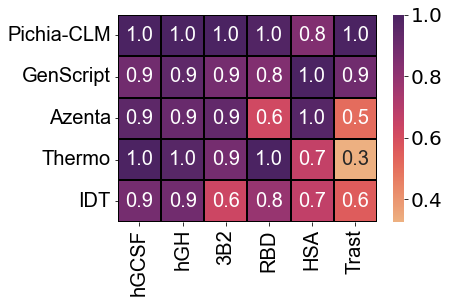

In [8]:
params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'} #, 'weight' : 'bold'
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (6, 6)


plotting_shuffled = (pd.DataFrame(plotting)/plotting.max(axis = 0)).iloc[index_id]
labels_sorted = []
for i in range(5):
    labels_sorted.append(ylabel_value[index_id[i]])

f, ax = plt.subplots(1,1, sharex= False, facecolor='w')
plt.gcf().subplots_adjust(bottom=0.4, left = 0.15)    
h_map = sns.heatmap(plotting_shuffled, 
                    linewidths=2,  linecolor = 'black',
                    cmap= sns.color_palette('flare', as_cmap=True), #'YlGnBu', 'crest'
                    annot = True, fmt='.1f',
               annot_kws = {'fontname': 'Arial', 'fontsize': 20}, #cbar_kws= {'fontname': 'Arial'},
                       xticklabels = xlabel_value)
ax.set_xticklabels(xlabel_value, **hfont)
ax.set_yticklabels(labels_sorted, **hfont, rotation = 0) #['']*len(labels_sorted)

cbar = h_map.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.savefig("./Plots/ComparisonWCompetitor/Competitor_TiterNormalized_sorted.pdf", dpi = 600, bbox_inches = "tight")

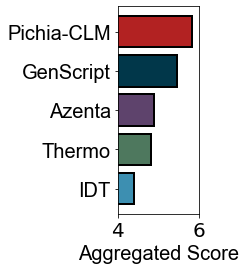

In [9]:
c_name = ['gray'] * 6 #['green', 'tan', 'tan', 'tan', 'lightcoral', 'olivedrab']
params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'} #, 'weight' : 'bold'
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (1.5, 6)
f, ax = plt.subplots(1,1, sharex= False, facecolor='w')
plt.gcf().subplots_adjust(bottom=0.4, left = 0.15)
c_name = ['firebrick', '#3D8FB1', '#01374A','#5E436C','#4E785E']

labels_sorted = []
# reverse_data = np.empty_like()
# for i in range()
reverse_index_id = Avg_score.sort_values(ascending=True).index

barlist = ax.barh(np.arange(0,5,1),Avg_score.sort_values(ascending=True).T) #np.arange(0, 5), , width=0.6
ax.set_xlim([4, 6])

ax.set_xlabel("Aggregated Score", **hfont)
ax.set_yticks(np.arange(0,5,1))

for i in np.arange(0,5,1):
    labels_sorted.append(ylabel_value[reverse_index_id[i]])
    barlist[i].set_color(c_name[reverse_index_id[i]])
    barlist[i].set(edgecolor = 'k', linewidth = 2) 
    
ax.set_yticklabels(labels_sorted, **hfont)
plt.savefig("./Plots/ComparisonWCompetitor/Competitor_AvgScore_Hbar.pdf", dpi = 600, bbox_inches = "tight")

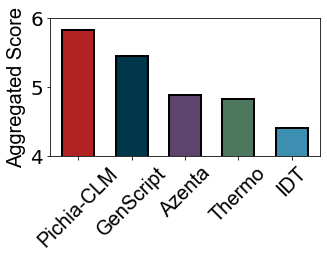

In [10]:
c_name = ['gray'] * 6 #['green', 'tan', 'tan', 'tan', 'lightcoral', 'olivedrab']
params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'} #, 'weight' : 'bold'
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (5, 4)
f, ax = plt.subplots(1,1, sharex= False, facecolor='w')
plt.gcf().subplots_adjust(bottom=0.4, left = 0.15)
c_name = ['firebrick', '#3D8FB1', '#01374A','#5E436C','#4E785E']

labels_sorted = []

barlist = ax.bar(np.arange(0, 5), Avg_score.sort_values(ascending=False), width=0.6)
ax.set_ylim([4, 6])

ax.set_ylabel("Aggregated Score", **hfont)
ax.set_xticks(np.arange(0,5,1))

for i in range(5):
    labels_sorted.append(ylabel_value[index_id[i]])
    barlist[i].set_color(c_name[index_id[i]])
    barlist[i].set(edgecolor = 'k', linewidth = 2) 
    
ax.set_xticklabels(labels_sorted, rotation = 45,**hfont)
plt.savefig("./Plots/ComparisonWCompetitor/Competitor_AvgScore.pdf", dpi = 600, bbox_inches = "tight")

In [12]:
df = pd.DataFrame(plotting)/plotting.max(axis = 0)
best = []
for i in range(df.shape[0]):
    best.append((df.iloc[i,:]>0.95).sum())

df_best = pd.DataFrame(np.array(best))
df_best.columns = ['best']
index_id = df_best.sort_values(by = ['best'], ascending=False).index

In [ ]:
df_best

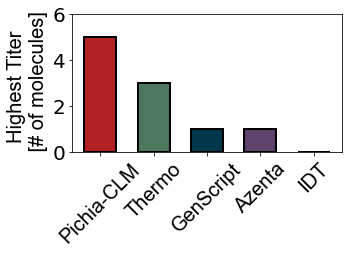

In [13]:
c_name = ['gray'] * 6 #['green', 'tan', 'tan', 'tan', 'lightcoral', 'olivedrab']
params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'} #, 'weight' : 'bold'
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (5, 4)
f, ax = plt.subplots(1,1, sharex= False, facecolor='w')
plt.gcf().subplots_adjust(bottom=0.4, left = 0.15)
c_name = ['firebrick', '#3D8FB1', '#01374A','#5E436C','#4E785E']

labels_sorted = []

barlist = ax.bar(np.arange(0, 5), df_best.sort_values(by = ['best'],ascending=False).T.values[0], width=0.6)
ax.set_ylim([0, 6])

ax.set_ylabel("Highest Titer \n [# of molecules]", **hfont)
ax.set_xticks(np.arange(0,5,1))

for i in range(5):
    labels_sorted.append(ylabel_value[index_id[i]])
    barlist[i].set_color(c_name[index_id[i]])
    barlist[i].set(edgecolor = 'k', linewidth = 2) 
    
ax.set_xticklabels(labels_sorted, rotation = 45,**hfont)
plt.savefig("./Plots/ComparisonWCompetitor/Competitor_Best.pdf", dpi = 600, bbox_inches = "tight")

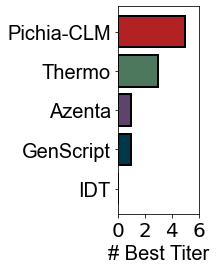

In [14]:
c_name = ['gray'] * 6 #['green', 'tan', 'tan', 'tan', 'lightcoral', 'olivedrab']
params = {'axes.titlesize': 20, 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'axes.labelsize': 20}
hfont = {'fontname':'Arial'} #, 'weight' : 'bold'
plt.rcParams.update(params)
plt.rcParams["figure.figsize"] = (1.5, 6)
f, ax = plt.subplots(1,1, sharex= False, facecolor='w')
plt.gcf().subplots_adjust(bottom=0.4, left = 0.15)
c_name = ['firebrick', '#3D8FB1', '#01374A','#5E436C','#4E785E']

labels_sorted = []
reverse_id = df_best.sort_values(by = ['best'],ascending=True).index
barlist = ax.barh(np.arange(0, 5,1), df_best.sort_values(by = ['best'],ascending=True).T.values[0]) #, width=0.6
ax.set_xlim([0, 6])

ax.set_xlabel("# Best Titer", **hfont)
ax.set_xticks(np.arange(0,7,2), **hfont)

for i in range(5):
    labels_sorted.append(ylabel_value[reverse_id[i]])
    barlist[i].set_color(c_name[reverse_id[i]])
    barlist[i].set(edgecolor = 'k', linewidth = 2) 

ax.set_yticks(np.arange(0,5,1), **hfont)
ax.set_yticklabels(labels_sorted, **hfont)
plt.savefig("./Plots/ComparisonWCompetitor/Competitor_Best_Hbar.pdf", dpi = 600, bbox_inches = "tight")

In [ ]:
df_best.sort_values(by = ['best'],ascending=True).index

In [ ]:
reverse_id

In [ ]:
labels_sorted